In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display
import seaborn as sn
from pandas import DataFrame
import requests
import gmaps
import os
from pprint import pprint
import re 

# Import API key
from api_keys import g_key
from api_keys import weather_key

In [2]:
final_file = "Resources/mega_df.csv"

In [3]:
df = pd.read_csv(final_file)

In [4]:
df.head() 

,Unnamed: 0,index,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),capital
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463,Kabul
1,1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610,Tirana
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388,Algiers
3,3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869,Andorra la Vella
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281,Luanda


### Part Two - Data Summary
* Display a list of columns in the dataset
* Display a list of regions in the dataset
* Display a list of countries in the dataset
* Display a list of wine-producing countries
* Calculate total number of countries
* Calculate overall average alcohol consumption

####  Display a list of columns

In [5]:
columns = df.columns
columns_string =', '.join(columns)
print(f"List of column names: {columns_string}")

List of column names: Unnamed: 0, index, continent, country_code, country, consumption_per_capita_(L), climate, main_export, main_industry, region, happy_score, life_expectancy, gdp_per_capita, code, mental_health_and_addiction (%), capital


#### Display a list of regions

In [6]:
regions = df["region"].unique()
regions_string = ", ".join(map(str, regions))

print(f"List of regions represented in the dataset: {regions_string}")
regions

DataFrame.dropna

List of regions represented in the dataset: South Asia, Central and Eastern Europe, Middle East and North Africa, nan, Commonwealth of Independent States, Latin America and Caribbean, North America and ANZ, Western Europe, Sub-Saharan Africa, Southeast Asia, East Asia


<function pandas.core.frame.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)>

#### Display a list of countries

In [7]:
countries = df["country"].unique()
countries_string = ', '.join(countries)

print(f"List of countries represented in the dataset: {countries_string}")

List of countries represented in the dataset: Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Azerbaijan, Argentina, Australia, Austria, Bahamas, Bahrain, Bangladesh, Armenia, Barbados, Belgium, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Belize, Solomon Islands, Brunei, Bulgaria, Myanmar, Burundi, Belarus, Cambodia, Cameroon, Canada, Cape Verde, Central African Republic, Sri Lanka, Chad, Chile, China, Colombia, Comoros, Congo, Democratic Republic of Congo, Costa Rica, Croatia, Cuba, Cyprus, Czechia, Benin, Denmark, Dominica, Dominican Republic, Ecuador, El Salvador, Equatorial Guinea, Ethiopia, Eritrea, Estonia, Fiji, Finland, France, Djibouti, Gabon, Georgia, Gambia, Germany, Ghana, Kiribati, Greece, Grenada, Guatemala, Guinea, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Cote d'Ivoire, Jamaica, Japan, Kazakhstan, Jordan, Kenya, North Korea, South Korea, Kuwait, Kyrgyzstan, Laos, Lebanon, Lesotho,

####  Calculate how many countries are represented in the data 

In [8]:
total_countries = df.shape[0] 
print(f'The total number of rows countries represented in the dataset are {total_countries}.') 

# Alternative methods:
#number_countries = df_11['country'].nunique()
# unique_countries = df_8['country'].unique()
# number_countries = len(unique_countries)

The total number of rows countries represented in the dataset are 186.


In [9]:
overall_avg_consumption = df["consumption_per_capita_(L)"].mean() 
overall_avg_consumption
formatted_consumption = round(overall_avg_consumption,2)

print(f"The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is {overall_avg_consumption}.")  


The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is 6.165053763440862.


In [10]:
print(f"List of column names: {columns_string}")
print("------------------------------------------------------------------------------------------")
print(f"List of regions represented in the dataset: {regions_string}")
print("------------------------------------------------------------------------------------------")
print(f"List of countries represented in the dataset: {countries_string}")
print("------------------------------------------------------------------------------------------")
print(f"Total number of countries represented in the dataset: {total_countries}")
print("------------------------------------------------------------------------------------------")
print(f"Overall average of alcohol consumption per capita (liters): {formatted_consumption}") 
print("------------------------------------------------------------------------------------------")

List of column names: Unnamed: 0, index, continent, country_code, country, consumption_per_capita_(L), climate, main_export, main_industry, region, happy_score, life_expectancy, gdp_per_capita, code, mental_health_and_addiction (%), capital
------------------------------------------------------------------------------------------
List of regions represented in the dataset: South Asia, Central and Eastern Europe, Middle East and North Africa, nan, Commonwealth of Independent States, Latin America and Caribbean, North America and ANZ, Western Europe, Sub-Saharan Africa, Southeast Asia, East Asia
------------------------------------------------------------------------------------------
List of countries represented in the dataset: Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Azerbaijan, Argentina, Australia, Austria, Bahamas, Bahrain, Bangladesh, Armenia, Barbados, Belgium, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Belize, Solomon Islands, Brunei, 

### Part Three - Consumption Levels by Country
* Group alcohol consumption within 5 bins and display as new column within dataframe
* Display value counts of 5 bins
* Create a for loop to separate each bin as its own dataframe
* Calculate values for each bin
* Display correlation matrix

In [11]:
# Create bins and apply to current dataframe as new column
df_test = pd.cut(df["consumption_per_capita_(L)"], bins=5)
cut_labels = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
cut_bins = [0, 1, 4, 7, 10, 20]
df["Drinking_Bins"] = pd.cut(df["consumption_per_capita_(L)"], bins=cut_bins, labels=cut_labels)

df["Drinking_Bins"].value_counts()

Heavy         45
Light         40
Very Heavy    37
Medium        36
Very Light    23
Name: Drinking_Bins, dtype: int64

In [12]:
# Create a for loop to create separate dataframes for each bin 
drinking_bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
consumption_values = []
country_number = []

for drinking_bins in drinking_bins:
    bins_df = df.loc[df["Drinking_Bins"] == drinking_bins]
    
    values=bins_df["consumption_per_capita_(L)"].sum()
    consumption_values.append(values)
    
    number = len(df)
    country_number.append(number)
    
    avg_consumption_bins = np.array([consumption_values])/np.array([country_number])

print(avg_consumption_bins)

[[0.07311828 0.54408602 1.09301075 2.0844086  2.37043011]]


In [13]:
#Create a dataframe for each bin 
very_light_df = df.loc[df['Drinking_Bins']=='Very Light']

very_light_df.round(2)
#averages
very_light_consumption = very_light_df["consumption_per_capita_(L)"].mean()
very_light_happiness = very_light_df["happy_score"].mean()
very_light_life = very_light_df["life_expectancy"].mean()
very_light_gdp = very_light_df["gdp_per_capita"].mean()
very_light_addiction = very_light_df["mental_health_and_addiction (%)"].mean()

print(very_light_consumption)
print(very_light_happiness)
print(very_light_life)
print(very_light_gdp)
print(very_light_addiction)

0.591304347826087
4.784356251312501
61.586327790625006
8.9320933815
13.588588626086958


#### Calculate Values For Each Bin

In [14]:
# Calculate values for 'light' drinkers
light_df = df.loc[df['Drinking_Bins']=='Light']
light_consumption = light_df["consumption_per_capita_(L)"].mean()
light_happiness = light_df["happy_score"].mean()
light_life = light_df["life_expectancy"].mean()
light_gdp = light_df["gdp_per_capita"].mean()
light_addiction = light_df["mental_health_and_addiction (%)"].mean()

print(light_consumption,light_happiness,light_life, light_gdp,light_addiction)

# Calculate values for 'medium' drinkers
medium_df = df.loc[df['Drinking_Bins']=='Medium']
medium_consumption = medium_df["consumption_per_capita_(L)"].mean()
medium_happiness = medium_df["happy_score"].mean()
medium_life = medium_df["life_expectancy"].mean()
medium_gdp = medium_df["gdp_per_capita"].mean()
medium_addiction = medium_df["mental_health_and_addiction (%)"].mean()

print(medium_consumption,medium_happiness,medium_life,medium_gdp,medium_addiction)

# Calculate values for 'heavy' drinkers
heavy_df = df.loc[df['Drinking_Bins']=='Heavy']
heavy_consumption = heavy_df["consumption_per_capita_(L)"].mean()
heavy_happiness = heavy_df["happy_score"].mean()
heavy_life = heavy_df["life_expectancy"].mean()
heavy_gdp = heavy_df["gdp_per_capita"].mean()
heavy_addiction = heavy_df["mental_health_and_addiction (%)"].mean()

print(heavy_consumption, heavy_happiness, heavy_life, heavy_gdp, heavy_addiction)

# Calculate values for 'heavy' drinkers
heavy_df = df.loc[df['Drinking_Bins']=='Heavy']
heavy_consumption = heavy_df["consumption_per_capita_(L)"].mean()
heavy_happiness = heavy_df["happy_score"].mean()
heavy_life = heavy_df["life_expectancy"].mean()
heavy_gdp = heavy_df["gdp_per_capita"].mean()
heavy_addiction = heavy_df["mental_health_and_addiction (%)"].mean()

print(heavy_consumption, heavy_happiness, heavy_life, heavy_gdp, heavy_addiction)

# Calculate values for 'very heavy' drinkers
very_heavy_df = df.loc[df['Drinking_Bins']=='Very Heavy']
very_heavy_consumption = very_heavy_df["consumption_per_capita_(L)"].mean()
very_heavy_happiness = very_heavy_df["happy_score"].mean()
very_heavy_life = very_heavy_df["life_expectancy"].mean()
very_heavy_gdp = very_heavy_df["gdp_per_capita"].mean()
very_heavy_addiction = very_heavy_df["mental_health_and_addiction (%)"].mean()

print(very_heavy_consumption,very_heavy_happiness,very_heavy_life,very_heavy_gdp,very_heavy_addiction)

2.53 5.2051606944642845 61.61110319428571 8.570028322035714 12.353983505128205
5.647222222222223 5.079172010480001 62.664390411599996 8.762150802640003 12.320441922571424
8.615555555555556 5.629619986657144 65.8943797522857 9.568910789999997 13.171500725681824
8.615555555555556 5.629619986657144 65.8943797522857 9.568910789999997 13.171500725681824
11.916216216216217 6.302539377515151 69.08792576666667 10.252519087363638 13.515031362162162


#### Create Correlation Matrix

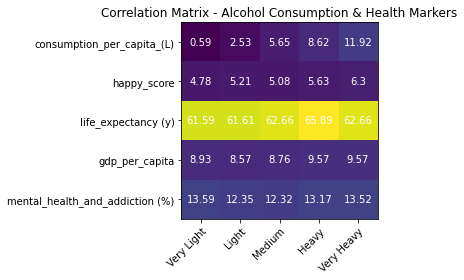

In [15]:
Labels = ["consumption_per_capita_(L)", "happy_score", "life_expectancy (y)", "gdp_per_capita", "mental_health_and_addiction (%)"]
Bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]

#Creates array and rounds to 2 decimal places
data = np.around([[very_light_consumption,light_consumption,medium_consumption,heavy_consumption,very_heavy_consumption],
                 [very_light_happiness,light_happiness,medium_happiness,heavy_happiness,very_heavy_happiness],
                 [very_light_life,light_life,medium_life,heavy_life,medium_life],
                 [very_light_gdp,light_gdp,medium_gdp,heavy_gdp,heavy_gdp],
                 [very_light_addiction,light_addiction,medium_addiction,heavy_addiction,very_heavy_addiction]], decimals=2)

fig, ax = plt.subplots()
im = ax.imshow(data)

#define bounds of array equal to number of labels
ax.set_xticks(np.arange(len(Bins)))
ax.set_yticks(np.arange(len(Labels)))
#Label each Axis
ax.set_xticklabels(Bins)
ax.set_yticklabels(Labels)
#Rotate Labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(Labels)):
    for j in range(len(Bins)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

ax.set_title("Correlation Matrix - Alcohol Consumption & Health Markers")
fig.tight_layout()
plt.show()

### Part Four - Drunkest Countries


#### Find the 10 countries that consumes the most alcohol 

In [16]:
country_mask = df.groupby("country")
country_subset = country_mask.first()


high_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=False).head(n=10)
high_consumption.reset_index() 

high_consumption_series = high_consumption["consumption_per_capita_(L)"], high_consumption["capital"] 

high_consumption_df = pd.DataFrame(high_consumption_series)
high_consumption_df = high_consumption_df.transpose()

most_alcohol = high_consumption_df.index.tolist()

print("The countries with the highest consumption rates are " + ", ".join(most_alcohol))

capitals = high_consumption_df['capital'].tolist()  

capitals 

The countries with the highest consumption rates are Moldova, Lithuania, Czechia, Nigeria, Germany, Luxembourg, Ireland, Latvia, Bulgaria, Slovenia


['Chisinau',
 'Vilnius',
 nan,
 'Abuja',
 'Berlin',
 'Luxembourg',
 'Dublin',
 'Riga',
 'Sofia',
 'Ljubljana']

#### Find the 10 countries that consumes the least alcohol 

In [17]:
low_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=True).head(n=10)
low_consumption.reset_index() 

low_consumption_series = low_consumption["consumption_per_capita_(L)"]  
low_consumption_df = pd.DataFrame(low_consumption_series)

least_alcohol = low_consumption_df.index.tolist()

print("The countries with the lowest consumption rates are " + ", ".join(least_alcohol))

low_consumption_df

The countries with the lowest consumption rates are Somalia, Mauritania, Libya, Bangladesh, Kuwait, Yemen, Afghanistan, Saudi Arabia, Pakistan, Iraq


,consumption_per_capita_(L)
country,
Somalia,0.0
Mauritania,0.0
Libya,0.0
Bangladesh,0.0
Kuwait,0.0
Yemen,0.1
Afghanistan,0.2
Saudi Arabia,0.2
Pakistan,0.3


#### Find latitude and longitude for the 10 countries with the highest consumption

In [18]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

In [19]:
# Convert capital column to list
capitals = high_consumption_df['capital'].tolist()  

# Create container for list of capitals
cities = ['Chisinau','Vilnius','Prague','Abuja','Berlin','Luxembourg','Dublin','Riga','Sofia','Ljubljana']

# Set up lists to hold reponse info
lat = []
lon = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])

print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lon}") 

The latitude information received is: [47.0056, 54.6892, 50.088, 9.0574, 52.5244, 50, 37.7021, 57, 42.6975, 46.0511]
The longitude information received is: [28.8575, 25.2798, 14.4208, 7.4898, 13.4105, 5.5, -121.9358, 24.0833, 23.3242, 14.5051]


#### Add latitude and longitude columns to dataframe

In [20]:
high_consumption_df['latitude'] = lat
high_consumption_df['longitude'] = lon

high_consumption_df

,consumption_per_capita_(L),capital,latitude,longitude
country,,,,
Moldova,15.2,Chisinau,47.0056,28.8575
Lithuania,15,Vilnius,54.6892,25.2798
Czechia,14.4,NaN,50.0880,14.4208
Nigeria,13.4,Abuja,9.0574,7.4898
Germany,13.4,Berlin,52.5244,13.4105
Luxembourg,13,Luxembourg,50.0000,5.5000
Ireland,13,Dublin,37.7021,-121.9358
Latvia,12.9,Riga,57.0000,24.0833
Bulgaria,12.7,Sofia,42.6975,23.3242


#### Create a heatmap to display the drunkest countries

In [21]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [22]:
# Store 'Lat' and 'Lng' into  locations 
locations = high_consumption_df[["latitude", "longitude"]]

# Create a poverty Heatmap layer
fig = gmaps.figure(center=[10,15], zoom_level=2)

heat_layer = gmaps.heatmap_layer(locations, weights=high_consumption_df['consumption_per_capita_(L)'], dissipating=False, max_intensity=15, point_radius = 4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

### Part Four - Drunkest Countries Summary 

In [23]:
print("The 10 countries with the highest consumption rates of alcohol: " + ", ".join(most_alcohol))
print("------------------------------------------------------------------------------------------")
print("The 10 countries with the lowest consumption rates of alchohol: " + ", ".join(least_alcohol)) 

The 10 countries with the highest consumption rates of alcohol: Moldova, Lithuania, Czechia, Nigeria, Germany, Luxembourg, Ireland, Latvia, Bulgaria, Slovenia
------------------------------------------------------------------------------------------
The 10 countries with the lowest consumption rates of alchohol: Somalia, Mauritania, Libya, Bangladesh, Kuwait, Yemen, Afghanistan, Saudi Arabia, Pakistan, Iraq


In [28]:
country_subset.columns


Index(['Unnamed: 0', 'index', 'continent', 'country_code',
       'consumption_per_capita_(L)', 'climate', 'main_export', 'main_industry',
       'region', 'happy_score', 'life_expectancy', 'gdp_per_capita', 'code',
       'mental_health_and_addiction (%)', 'capital', 'Drinking_Bins'],
      dtype='object')

## Part Five - Consumption & Geography -  Continent 

#### Use a for loop to find consumption averages by continent

In [34]:
# Create containers to hold aggregate values for each continent in for loop
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'] 
segment_values = []
number_countries = []

# Filter each segment from our list 'continent' in the dataframe
for continent in continents:
    df_loop = country_subset.loc[country_subset["continent"] == continent]
    # Aggregate the consumption values for each continent in the dataframe
    values = df_loop['consumption_per_capita_(L)'].sum()
    segment_values.append(values)
    # Find number of countries for each continent in the dataframe
    consumption_by_segment = len(df_loop)
    number_countries.append(consumption_by_segment)
    # Find the average consumption for each continent
    # Division is not a supported operation on lists so use np.array to perform a function
    avg_consumption_by_continent = np.array([segment_values]) / np.array([number_countries])
    
    
#print(avg_consumption_by_continent[0][0])
#print(segment_values)
#print(number_countries) 

df_loop = pd.DataFrame({"continent": continents, "total_consumption(liters)": segment_values, "avg_consumption(liters)": avg_consumption_by_continent [0], "num_countries": number_countries})
df_loop = df_loop.sort_values("avg_consumption(liters)", ascending=False)
df_loop

,continent,total_consumption(liters),avg_consumption(liters),num_countries
2,Europe,473.4,10.291304,46
4,South America,83.2,6.933333,12
3,North America,157.3,6.839130,23
0,Africa,252.7,4.767925,53
5,Oceania,42.5,3.541667,12
1,Asia,137.6,3.440000,40


#### Create a boxplot to compare consumption values for each continent 

In [35]:
df

,Unnamed: 0,index,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),capital,Drinking_Bins
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463,Kabul,Very Light
1,1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610,Tirana,Heavy
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388,Algiers,Very Light
3,3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869,Andorra la Vella,Very Heavy
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281,Luanda,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,181,5129,Asia,UZB,Uzbekistan,2.7,"mostly mid-latitude desert, long, hot summers,...",Cotton,textiles,Commonwealth of Independent States,6.2576,65.107574,8.740372,UZB,10.897074,Tashkent,Light
182,182,5130,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,VEN,11.014506,Caracas,Medium
183,183,5131,Oceania,WSM,Samoa,2.5,"tropical; rainy season (November to April), dr...",Coconut oil and cream,food processing,NaN,NaN,NaN,NaN,WSM,11.152716,Apia,Light
184,184,5132,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Crude oil,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,YEM,15.819471,Sanaá,Very Light


<AxesSubplot:title={'center':'consumption_per_capita_(L)'}, xlabel='continent'>

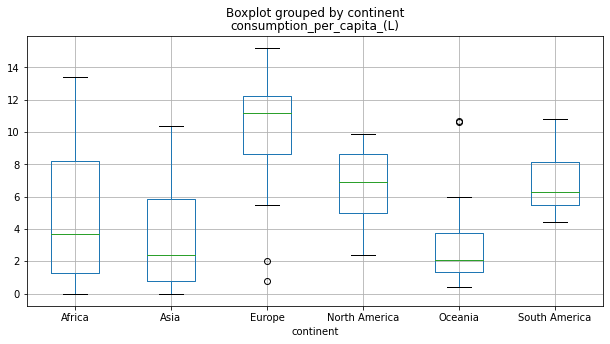

In [36]:
# Create lists for every country

df.boxplot("consumption_per_capita_(L)",by="continent", figsize=(10,5)) 

In [37]:
# Create containers and conditionals for for loop
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for continent in continents:
    df = country_subset.loc[country_subset["continent"] == continent]
    
    # Create a series that consists of all final volume values for each regimen
    values = df['consumption_per_capita_(L)']
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {continent}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {continent}: {lower_bound}')
    print(f'Upper Bound for {continent}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(df['consumption_per_capita_(L)'] >= upper_bound) | 
                                        (df['consumption_per_capita_(L)'] <= lower_bound)]).count()
    print(f'Number of {continent} outliers: {outliers_count}')

IQR for Africa: 6.8999999999999995
Lower Bound for Africa: -9.049999999999999
Upper Bound for Africa: 18.549999999999997
Number of Africa outliers: 0
IQR for Asia: 5.05
Lower Bound for Asia: -6.799999999999999
Upper Bound for Asia: 13.399999999999999
Number of Asia outliers: 0
IQR for Europe: 3.6250000000000018
Lower Bound for Europe: 3.1874999999999973
Upper Bound for Europe: 17.687500000000004
Number of Europe outliers: 2
IQR for North America: 3.6500000000000004
Lower Bound for North America: -0.47500000000000053
Upper Bound for North America: 14.125
Number of North America outliers: 0
IQR for South America: 2.700000000000001
Lower Bound for South America: 1.424999999999998
Upper Bound for South America: 12.225000000000001
Number of South America outliers: 0
IQR for Oceania: 2.4000000000000004
Lower Bound for Oceania: -2.250000000000001
Upper Bound for Oceania: 7.3500000000000005
Number of Oceania outliers: 2


In [39]:
# Identify the outliers in the Oceania subset data
oceania_df = country_subset.loc[country_subset['continent'] == 'Oceania']
outliers_oceania = oceania_df.loc[(oceania_df['consumption_per_capita_(L)'] >= 7.3500000000000005) | 
                                        (oceania_df['consumption_per_capita_(L)'] <= -2.250000000000001)] 
outliers_oceania


,Unnamed: 0,index,continent,country_code,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),capital,Drinking_Bins
country,,,,,,,,,,,,,,,,
Australia,8,4949,Oceania,AUS,10.6,generally arid to semiarid; temperate in south...,Ores and metals,mining,North America and ANZ,7.2228,73.604538,10.720596,AUS,18.077892,Canberra,Very Heavy
New Zealand,120,5066,Oceania,NZL,10.7,temperate with sharp regional contrasts,Wool,food processing,North America and ANZ,7.2996,73.202629,10.500943,NZL,18.495605,Wellington,Very Heavy


In [38]:
# Identify the outliers in the Europe subset data
europe_df = country_subset.loc[country_subset['continent'] == 'Europe']
outliers_europe = europe_df.loc[(europe_df['consumption_per_capita_(L)'] >= 17.687500000000004) | 
                                        (europe_df['consumption_per_capita_(L)'] <= 3.1874999999999973)] 
outliers_europe

,Unnamed: 0,index,continent,country_code,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),capital,Drinking_Bins
country,,,,,,,,,,,,,,,,
Azerbaijan,6,4946,Europe,AZE,0.8,"dry, semiarid steppe",Oil,petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,AZE,10.495815,Baku,Very Light
Turkey,169,5116,Europe,TUR,2.0,"temperate; hot, dry summers with mild, wet win...",Clothing and textiles,textiles,Middle East and North Africa,5.1318,66.902817,10.129419,TUR,14.536026,Ankara,Light
